In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


# knn
* import dateset
* dataset tanıtım
* dataset görselleştirme
* knn with skelearn


In [32]:
data=pd.read_csv("../input/column_2C_weka.csv")

In [33]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [35]:
data=data.rename(columns={"class": "degree"})
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,degree
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [36]:
A=data[data.degree=="Abnormal"]
N=data[data.degree=="Normal"]

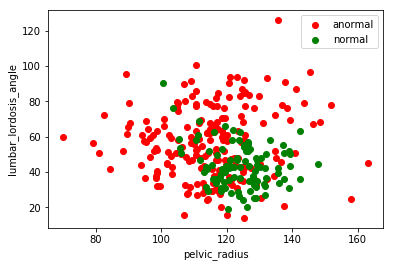

In [37]:
#scatter plot
plt.scatter(A.pelvic_radius,A.lumbar_lordosis_angle,color="red",label="anormal")
plt.scatter(N.pelvic_radius,N.lumbar_lordosis_angle,color="green",label="normal")
plt.xlabel("pelvic_radius")
plt.ylabel("lumbar_lordosis_angle")
plt.legend()
plt.show()

In [38]:
#binary sisteme çevir
data.degree=[1 if each=="Normal" else 0 for each in data.degree]
x_data=data.drop(["degree"],axis=1)
y=data.degree.values

In [39]:
#normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [41]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)# n_neighbors=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(" {} nn score: {}".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.7741935483870968


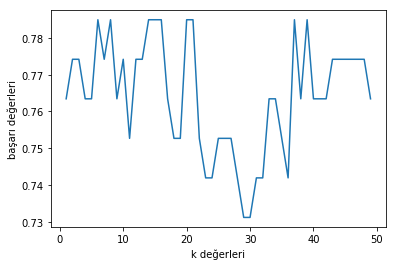

In [48]:
#en iyi değer

score_list=[]
for each in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=each) # n_neighbors=k
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("başarı değerleri")
plt.show()